In [1]:
import pandas as pd
import DecisionBoundry 
import contour
import numpy as np

In [2]:
df=pd.read_csv('ls.csv').drop('Unnamed: 0',axis=1)
df

,x1,x2,Class
0,14.73100,-0.103770,1
1,13.76600,-0.000418,1
2,14.23600,-0.421920,1
3,16.02300,2.230500,1
4,19.06500,0.715650,1
...,...,...,...
1495,0.28398,2.844000,3
1496,0.47872,5.854100,3
1497,0.29237,-0.132980,3
1498,-2.82220,-5.225300,3


In [19]:
mean=np.mean(df[df['Class']==3][['x1','x2']].values,axis=0)
mean

array([0.13610135, 0.6389929 ])

In [3]:
db=DecisionBoundry.decisionBoundry(df,'Class',['x1','x2'])

In [4]:
cov_matrices = [
    np.cov(df[df['Class']==1]['x1'],df[df['Class']==1]['x2']),
    np.cov(df[df['Class']==2]['x1'],df[df['Class']==2]['x2']),
    np.cov(df[df['Class']==3]['x1'],df[df['Class']==3]['x2'])
  ]

In [17]:
for idx, matrix in enumerate(cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[8.57638362 3.01063963]
 [3.01063963 2.32545248]]

Updated Covariance Matrix 2:
[[ 3.03979616 -1.62096262]
 [-1.62096262  4.42147128]]

Updated Covariance Matrix 3:
[[1.97008637 1.64243801]
 [1.64243801 9.67089938]]



/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/DecisionBoundry.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


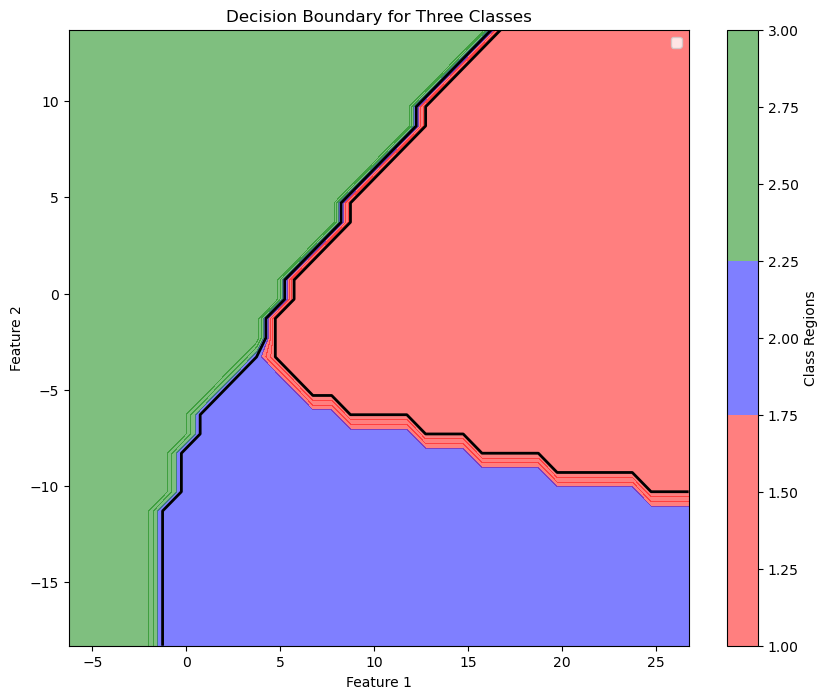

In [5]:
db.plot_decision(df[['x1','x2']])

In [6]:

z_cov_matrices=[]
for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    diag = np.diag(np.diag(cov_matrix))  
    z_cov_matrices.append(diag)
for idx, matrix in enumerate(z_cov_matrices):
    print(f"Updated Covariance Matrix {idx+1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[8.57638362 0.        ]
 [0.         2.32545248]]

Updated Covariance Matrix 2:
[[3.03979616 0.        ]
 [0.         4.42147128]]

Updated Covariance Matrix 3:
[[1.97008637 0.        ]
 [0.         9.67089938]]



In [7]:

d_cov_matrices = []

for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    value=cov_matrix[0,0]
    diag = np.array([
        [value, 0],
        [0, value]
    ])  # Create the diagonal matrix with variance_x1
    d_cov_matrices.append(diag)

for idx, matrix in enumerate(d_cov_matrices):
    print(f"Updated Covariance Matrix {idx + 1}:\n{matrix}\n")

Updated Covariance Matrix 1:
[[8.57638362 0.        ]
 [0.         8.57638362]]

Updated Covariance Matrix 2:
[[3.03979616 0.        ]
 [0.         3.03979616]]

Updated Covariance Matrix 3:
[[1.97008637 0.        ]
 [0.         1.97008637]]



In [8]:
c=contour.decisionBoundary(df,'Class',['x1','x2'])

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


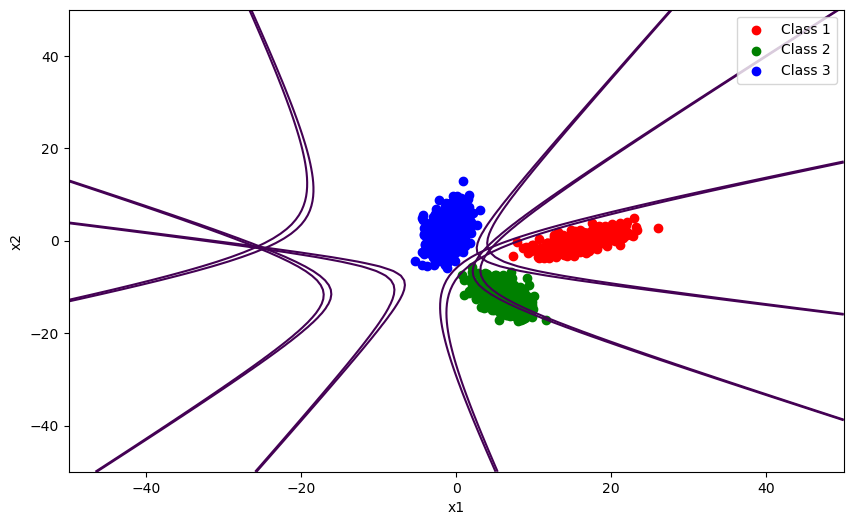

In [9]:
p1=c.plot_decision_boundaries_with_cov(cov_matrices,False)
p1

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


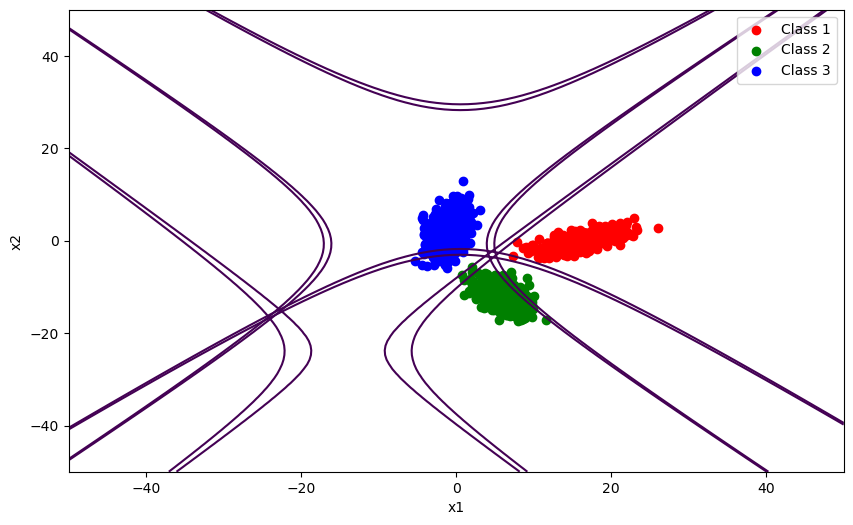

In [10]:

p3=c.plot_decision_boundaries_with_cov(z_cov_matrices,False)
p3

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


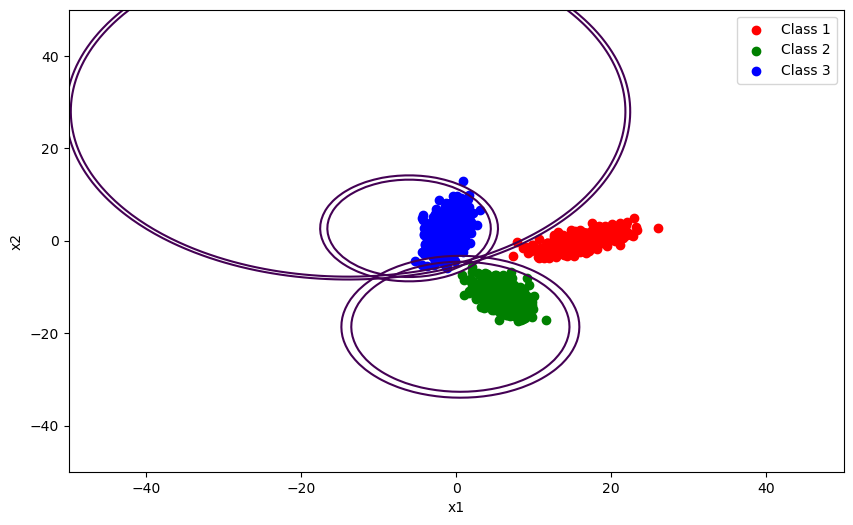

In [11]:

p5=c.plot_decision_boundaries_with_cov(d_cov_matrices,False)
p5

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


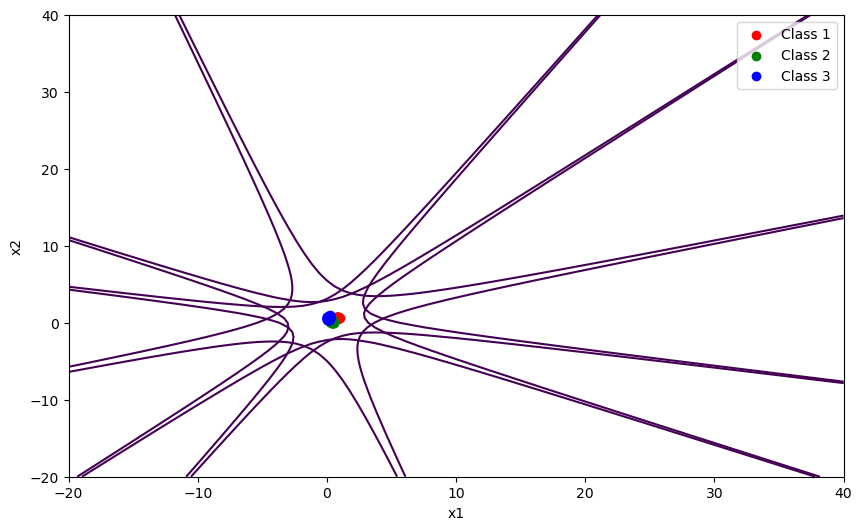

In [12]:
p2=c.plot_decision_boundaries_with_cov(cov_matrices,True)
p2

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


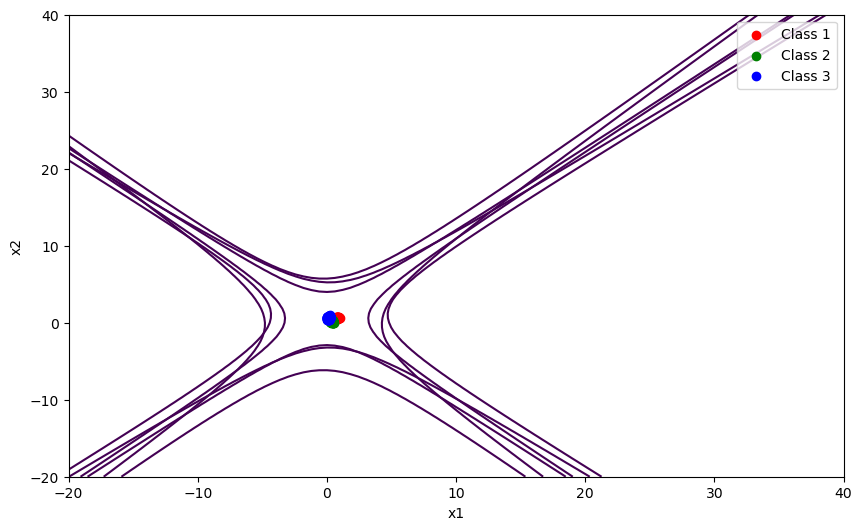

In [13]:

p4=c.plot_decision_boundaries_with_cov(z_cov_matrices,True)
p4

/home/savyasanchisharma/WinterInternship/BayesClassifier/Linearly Seperable/contour.py:58: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(


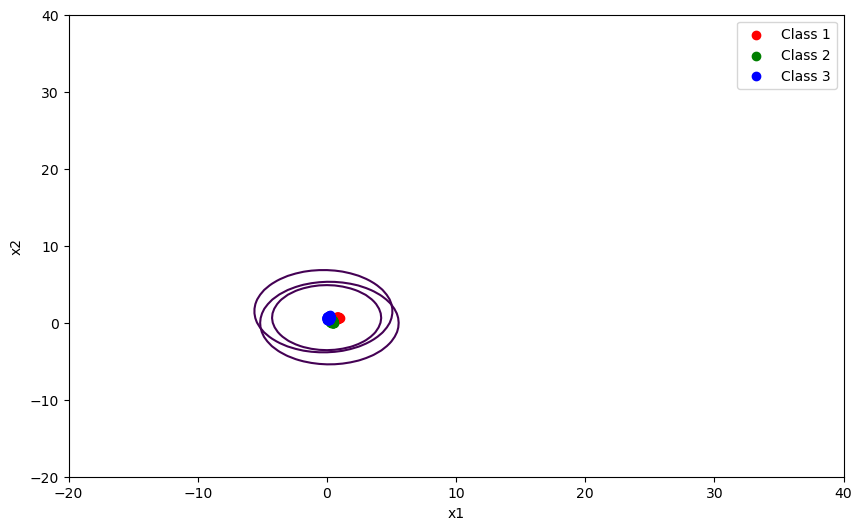

In [14]:
p6=c.plot_decision_boundaries_with_cov(d_cov_matrices,True)
p6